In [1]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('emissions.csv')

# Print the DataFrame
print(df)

       year state-name                                      sector-name  \
0      1970    Alabama              Industrial carbon dioxide emissions   
1      1970    Alabama              Industrial carbon dioxide emissions   
2      1970    Alabama              Industrial carbon dioxide emissions   
3      1970    Alabama              Industrial carbon dioxide emissions   
4      1970    Alabama  Total carbon dioxide emissions from all sectors   
...     ...        ...                                              ...   
59896  2021    Wyoming              Commercial carbon dioxide emissions   
59897  2021    Wyoming             Residential carbon dioxide emissions   
59898  2021    Wyoming             Residential carbon dioxide emissions   
59899  2021    Wyoming             Residential carbon dioxide emissions   
59900  2021    Wyoming  Total carbon dioxide emissions from all sectors   

         fuel-name       value  
0             Coal   26.721507  
1        Petroleum    3.577779  


In [2]:
# Drop rows that contain "all" in any cell
df = df[~df.apply(lambda row: row.astype(str).str.contains('all').any(), axis=1)]

# Print the DataFrame after dropping rows
print(df)

       year state-name                           sector-name    fuel-name  \
0      1970    Alabama   Industrial carbon dioxide emissions         Coal   
1      1970    Alabama   Industrial carbon dioxide emissions    Petroleum   
2      1970    Alabama   Industrial carbon dioxide emissions  Natural Gas   
3      1970    Alabama   Industrial carbon dioxide emissions    All Fuels   
8      1970    Alabama  Residential carbon dioxide emissions         Coal   
...     ...        ...                                   ...          ...   
59895  2021    Wyoming   Commercial carbon dioxide emissions    Petroleum   
59896  2021    Wyoming   Commercial carbon dioxide emissions         Coal   
59897  2021    Wyoming  Residential carbon dioxide emissions    All Fuels   
59898  2021    Wyoming  Residential carbon dioxide emissions  Natural Gas   
59899  2021    Wyoming  Residential carbon dioxide emissions    Petroleum   

           value  
0      26.721507  
1       3.577779  
2       8.944097  

In [3]:
# Drop rows that contain "all" in any cell
df = df[~df.apply(lambda row: row.astype(str).str.contains('All').any(), axis=1)]

# Print the DataFrame after dropping rows
print(df)

       year state-name                           sector-name    fuel-name  \
0      1970    Alabama   Industrial carbon dioxide emissions         Coal   
1      1970    Alabama   Industrial carbon dioxide emissions    Petroleum   
2      1970    Alabama   Industrial carbon dioxide emissions  Natural Gas   
8      1970    Alabama  Residential carbon dioxide emissions         Coal   
9      1970    Alabama  Residential carbon dioxide emissions    Petroleum   
...     ...        ...                                   ...          ...   
59894  2021    Wyoming   Commercial carbon dioxide emissions  Natural Gas   
59895  2021    Wyoming   Commercial carbon dioxide emissions    Petroleum   
59896  2021    Wyoming   Commercial carbon dioxide emissions         Coal   
59898  2021    Wyoming  Residential carbon dioxide emissions  Natural Gas   
59899  2021    Wyoming  Residential carbon dioxide emissions    Petroleum   

           value  
0      26.721507  
1       3.577779  
2       8.944097  

In [ ]:
# Write the DataFrame to a CSV file
df.to_csv('emissionsMinAll.csv', index=False)

In [4]:
# Group by 'year', 'sector-name', and 'fuel-name' and sum the 'value' column
aggregated_df = df.groupby(['year', 'sector-name', 'fuel-name'])['value'].sum().reset_index()

# Print the aggregated DataFrame
print(aggregated_df)

     year                              sector-name    fuel-name        value
0    1970      Commercial carbon dioxide emissions         Coal    31.306261
1    1970      Commercial carbon dioxide emissions  Natural Gas   260.289232
2    1970      Commercial carbon dioxide emissions    Petroleum   233.356940
3    1970  Electric Power carbon dioxide emissions         Coal  1374.959395
4    1970  Electric Power carbon dioxide emissions  Natural Gas   429.208459
..    ...                                      ...          ...          ...
717  2021      Industrial carbon dioxide emissions    Petroleum   698.180684
718  2021     Residential carbon dioxide emissions  Natural Gas   520.017628
719  2021     Residential carbon dioxide emissions    Petroleum   132.467958
720  2021  Transportation carbon dioxide emissions  Natural Gas   129.829709
721  2021  Transportation carbon dioxide emissions    Petroleum  3499.876283

[722 rows x 4 columns]


In [ ]:
# Write the DataFrame to a CSV file
aggregated_df.to_csv('emissionsMinAllAggregated.csv', index=False)

In [5]:
# Find the maximum value (year) in the 'year' column
max_year = aggregated_df['year'].max()

# Print the max year
print("Max year:", max_year)

Max year: 2021


In [6]:
# Find the minimum value (year) in the 'year' column
min_year = aggregated_df['year'].min()

# Print the min year
print("Min year:", min_year)

Min year: 1970


In [7]:
# Count the number of rows per year
rows_per_year = aggregated_df['year'].value_counts()

# Print the result
print("Rows per year:")
print(rows_per_year)

Rows per year:
1970    15
1972    15
1973    15
1974    15
1975    15
1976    15
1977    15
1971    15
2001    14
1995    14
1997    14
1998    14
1999    14
2000    14
2004    14
2002    14
2003    14
1993    14
2005    14
2006    14
2007    14
1994    14
1996    14
1992    14
1984    14
1991    14
1979    14
1980    14
1981    14
1982    14
1983    14
1978    14
1985    14
1987    14
1988    14
1989    14
1990    14
1986    14
2015    13
2020    13
2019    13
2018    13
2017    13
2016    13
2012    13
2014    13
2013    13
2011    13
2010    13
2009    13
2008    13
2021    13
Name: year, dtype: int64


In [8]:
# Get all unique values in the 'sector-name' column
unique_sectors = aggregated_df['sector-name'].unique()

# Print the unique values
print("Unique values in the 'sector-name' column:")
for sector in unique_sectors:
    print(sector)

Unique values in the 'sector-name' column:
Commercial carbon dioxide emissions
Electric Power carbon dioxide emissions
Industrial carbon dioxide emissions
Residential carbon dioxide emissions
Transportation carbon dioxide emissions


In [9]:
# Get all unique values in the 'fuel-name' column
unique_fuels = aggregated_df['fuel-name'].unique()

# Print the unique values
print("Unique values in the 'fuel-name' column:")
for fuel in unique_fuels:
    print(fuel)

Unique values in the 'fuel-name' column:
Coal
Natural Gas
Petroleum


In [10]:
# Create a pivot table with 'year', 'sector-name', and 'fuel-name' as indices and 'value' as values
pivot_df = aggregated_df.pivot_table(index=['year', 'sector-name', 'fuel-name'], values='value', aggfunc='sum').reset_index()

# Create a MultiIndex with all possible combinations of 'year', 'sector-name', and 'fuel-name'
all_years = aggregated_df['year'].unique()
all_sectors = aggregated_df['sector-name'].unique()
all_fuels = aggregated_df['fuel-name'].unique()
index = pd.MultiIndex.from_product([all_years, all_sectors, all_fuels], names=['year', 'sector-name', 'fuel-name'])

# Reindex the pivot table with the MultiIndex and fill missing values with 0
pivot_df = pivot_df.set_index(['year', 'sector-name', 'fuel-name']).reindex(index, fill_value=0).reset_index()

# Print the resulting DataFrame
print(pivot_df)

     year                              sector-name    fuel-name        value
0    1970      Commercial carbon dioxide emissions         Coal    31.306261
1    1970      Commercial carbon dioxide emissions  Natural Gas   260.289232
2    1970      Commercial carbon dioxide emissions    Petroleum   233.356940
3    1970  Electric Power carbon dioxide emissions         Coal  1374.959395
4    1970  Electric Power carbon dioxide emissions  Natural Gas   429.208459
..    ...                                      ...          ...          ...
775  2021     Residential carbon dioxide emissions  Natural Gas   520.017628
776  2021     Residential carbon dioxide emissions    Petroleum   132.467958
777  2021  Transportation carbon dioxide emissions         Coal     0.000000
778  2021  Transportation carbon dioxide emissions  Natural Gas   129.829709
779  2021  Transportation carbon dioxide emissions    Petroleum  3499.876283

[780 rows x 4 columns]


In [ ]:
# Write the DataFrame to a CSV file
pivot_df.to_csv('emissionsMinAllAggregatedPivot.csv', index=False)

In [11]:
# Count the number of rows per year
rows_per_year = pivot_df['year'].value_counts()

# Print the result
print("Rows per year:")
print(rows_per_year)

Rows per year:
1970    15
1971    15
1998    15
1999    15
2000    15
2001    15
2002    15
2003    15
2004    15
2005    15
2006    15
2007    15
2008    15
2009    15
2010    15
2011    15
2012    15
2013    15
2014    15
2015    15
2016    15
2017    15
2018    15
2019    15
2020    15
1997    15
1996    15
1995    15
1982    15
1972    15
1973    15
1974    15
1975    15
1976    15
1977    15
1978    15
1979    15
1980    15
1981    15
1983    15
1994    15
1984    15
1985    15
1986    15
1987    15
1988    15
1989    15
1990    15
1991    15
1992    15
1993    15
2021    15
Name: year, dtype: int64


In [12]:
# Sort the DataFrame by the 'year' column
pivot_df_sorted = pivot_df.sort_values(by='year')

In [13]:
# Group the DataFrame by 'sector-name'
grouped = pivot_df_sorted.groupby(['sector-name'])

# Create a dictionary to store the DataFrames
dfs_sector_name = {}

# Iterate over each group and store the corresponding DataFrame
for name, group in grouped:
    # Group the DataFrame by 'year' and 'sector-name' and sum the 'value' column
    group = group.groupby(['year', 'sector-name'])['value'].sum().reset_index()
    
    # Rename the 'fuel-name' to 'Total'
    group['fuel-name'] = 'Total'
    
    # Reorder the columns to match the original DataFrame
    group = group[['year', 'sector-name', 'fuel-name', 'value']]
    
    dfs_sector_name[name] = group

# Print the DataFrames for each unique combination of 'sector-name'
for name, df_group in dfs_sector_name.items():
    print("DataFrame for", name)
    print(df_group)
    print()

DataFrame for Commercial carbon dioxide emissions
    year                          sector-name fuel-name       value
0   1970  Commercial carbon dioxide emissions     Total  524.952433
1   1971  Commercial carbon dioxide emissions     Total  533.704471
2   1972  Commercial carbon dioxide emissions     Total  543.036232
3   1973  Commercial carbon dioxide emissions     Total  548.152104
4   1974  Commercial carbon dioxide emissions     Total  524.472206
5   1975  Commercial carbon dioxide emissions     Total  495.842203
6   1976  Commercial carbon dioxide emissions     Total  535.286695
7   1977  Commercial carbon dioxide emissions     Total  525.717476
8   1978  Commercial carbon dioxide emissions     Total  529.809257
9   1979  Commercial carbon dioxide emissions     Total  529.994150
10  1980  Commercial carbon dioxide emissions     Total  498.762521
11  1981  Commercial carbon dioxide emissions     Total  464.012750
12  1982  Commercial carbon dioxide emissions     Total  465.07846

In [14]:
# Group the DataFrame by 'fuel-name'
grouped = pivot_df_sorted.groupby(['fuel-name'])

# Create a dictionary to store the DataFrames
dfs_fuel_name = {}

# Iterate over each group and store the corresponding DataFrame
for name, group in grouped:
    # Group the DataFrame by 'year' and 'fuel-name' and sum the 'value' column
    group = group.groupby(['year', 'fuel-name'])['value'].sum().reset_index()
    
    # Rename the 'fuel-name' to 'Total'
    group['sector-name'] = 'Total'
    
    # Reorder the columns to match the original DataFrame
    group = group[['year', 'sector-name', 'fuel-name', 'value']]
    
    dfs_fuel_name[name] = group

# Print the DataFrames for each unique combination of 'fuel-name'
for name, df_group in dfs_fuel_name.items():
    print("DataFrame for", name)
    print(df_group)
    print()

DataFrame for Coal
    year sector-name fuel-name        value
0   1970       Total      Coal  2311.126560
1   1971       Total      Coal  2187.743724
2   1972       Total      Coal  2283.000112
3   1973       Total      Coal  2443.490583
4   1974       Total      Coal  2386.105741
5   1975       Total      Coal  2388.027333
6   1976       Total      Coal  2563.195745
7   1977       Total      Coal  2627.566307
8   1978       Total      Coal  2602.873837
9   1979       Total      Coal  2843.300211
10  1980       Total      Coal  2924.836740
11  1981       Total      Coal  3016.997098
12  1982       Total      Coal  2894.453933
13  1983       Total      Coal  3009.112576
14  1984       Total      Coal  3225.430596
15  1985       Total      Coal  3326.168963
16  1986       Total      Coal  3272.427202
17  1987       Total      Coal  3406.837920
18  1988       Total      Coal  3584.902972
19  1989       Total      Coal  3617.355257
20  1990       Total      Coal  3638.854087
21  1991     

In [ ]:
# # Group the DataFrame by 'sector-name' and 'fuel-name'
# grouped = pivot_df_sorted.groupby(['sector-name', 'fuel-name'])

# # Create a dictionary to store the DataFrames
# dfs = {}

# # Iterate over each group and store the corresponding DataFrame
# for name, group in grouped:
#     dfs[name] = group

# # Print the DataFrames for each unique combination of 'sector-name' and 'fuel-name'
# for name, df_group in dfs.items():
#     print("DataFrame for", name)
#     print(df_group)
#     print()

In [15]:
dfs = dfs_sector_name
dfs.update(dfs_fuel_name)

# Print the DataFrames for each unique combination of 'sector-name' and 'fuel-name'
for name, df_group in dfs.items():
    print("DataFrame for", name)
    print(df_group)
    print()

DataFrame for Commercial carbon dioxide emissions
    year                          sector-name fuel-name       value
0   1970  Commercial carbon dioxide emissions     Total  524.952433
1   1971  Commercial carbon dioxide emissions     Total  533.704471
2   1972  Commercial carbon dioxide emissions     Total  543.036232
3   1973  Commercial carbon dioxide emissions     Total  548.152104
4   1974  Commercial carbon dioxide emissions     Total  524.472206
5   1975  Commercial carbon dioxide emissions     Total  495.842203
6   1976  Commercial carbon dioxide emissions     Total  535.286695
7   1977  Commercial carbon dioxide emissions     Total  525.717476
8   1978  Commercial carbon dioxide emissions     Total  529.809257
9   1979  Commercial carbon dioxide emissions     Total  529.994150
10  1980  Commercial carbon dioxide emissions     Total  498.762521
11  1981  Commercial carbon dioxide emissions     Total  464.012750
12  1982  Commercial carbon dioxide emissions     Total  465.07846

In [16]:
# Creating Empty DataFrame and Storing it in variable df
feature_df =  pd.DataFrame()

feature_df.insert(0, 'year', range(1970, 2021 + 1))
 
# Printing Empty DataFrame
print(feature_df)

    year
0   1970
1   1971
2   1972
3   1973
4   1974
5   1975
6   1976
7   1977
8   1978
9   1979
10  1980
11  1981
12  1982
13  1983
14  1984
15  1985
16  1986
17  1987
18  1988
19  1989
20  1990
21  1991
22  1992
23  1993
24  1994
25  1995
26  1996
27  1997
28  1998
29  1999
30  2000
31  2001
32  2002
33  2003
34  2004
35  2005
36  2006
37  2007
38  2008
39  2009
40  2010
41  2011
42  2012
43  2013
44  2014
45  2015
46  2016
47  2017
48  2018
49  2019
50  2020
51  2021


In [17]:
# Insert Actual Data into Dataframe
# Iterate over each combination of 'sector-name' and 'fuel-name'
for name, df_group in dfs.items():
    print("Adding Column for", name)

    feature_df.insert(0, name, df_group['value'])

# Printing Empty DataFrame
print(feature_df)

Adding Column for Commercial carbon dioxide emissions
Adding Column for Electric Power carbon dioxide emissions
Adding Column for Industrial carbon dioxide emissions
Adding Column for Residential carbon dioxide emissions
Adding Column for Transportation carbon dioxide emissions
Adding Column for Coal
Adding Column for Natural Gas
Adding Column for Petroleum
      Petroleum  Natural Gas         Coal  \
0   3939.954943  2255.982068  2311.126560   
1   4083.996663  2325.650502  2187.743724   
2   4394.679931  2359.147560  2283.000112   
3   4639.629455  2347.243536  2443.490583   
4   4444.107084  2257.439848  2386.105741   
5   4373.147918  2078.381797  2388.027333   
6   4694.591088  2120.151965  2563.195745   
7   4949.963919  2077.356991  2627.566307   
8   5046.829520  2087.829825  2602.873837   
9   4856.389913  2153.663515  2843.300211   
10  4458.481488  2122.277028  2924.836740   
11  4169.411750  2074.575749  3016.997098   
12  3952.016678  1930.018853  2894.453933   
13  3934.1

In [18]:
#divide df into 2 groups. by sector-name and by fuel-name
feature_sector_df = feature_df.drop(columns=['Petroleum', 'Coal', 'Natural Gas'])
# Printing Empty DataFrame
print(feature_sector_df)

    Transportation carbon dioxide emissions  \
0                               2263.336813   
1                               2352.662168   
2                               2492.989811   
3                               2624.260159   
4                               2556.368151   
5                               2577.130243   
6                               2700.961919   
7                               2805.805592   
8                               2920.220529   
9                               2899.750450   
10                              2789.706724   
11                              2761.261172   
12                              2698.007231   
13                              2707.416975   
14                              2770.797704   
15                              2833.080796   
16                              2932.293175   
17                              3024.922701   
18                              3143.865763   
19                              3165.742537   
20           

In [19]:
#divide df into 2 groups. by sector-name and by fuel-name
feature_fuel_df = feature_df.drop(columns=feature_df.columns.difference(['Petroleum', 'Coal', 'Natural Gas', 'year']))
# Printing Empty DataFrame
print(feature_fuel_df)

      Petroleum  Natural Gas         Coal  year
0   3939.954943  2255.982068  2311.126560  1970
1   4083.996663  2325.650502  2187.743724  1971
2   4394.679931  2359.147560  2283.000112  1972
3   4639.629455  2347.243536  2443.490583  1973
4   4444.107084  2257.439848  2386.105741  1974
5   4373.147918  2078.381797  2388.027333  1975
6   4694.591088  2120.151965  2563.195745  1976
7   4949.963919  2077.356991  2627.566307  1977
8   5046.829520  2087.829825  2602.873837  1978
9   4856.389913  2153.663515  2843.300211  1979
10  4458.481488  2122.277028  2924.836740  1980
11  4169.411750  2074.575749  3016.997098  1981
12  3952.016678  1930.018853  2894.453933  1982
13  3934.166483  1807.680903  3009.112576  1983
14  4048.372722  1927.212791  3225.430596  1984
15  4024.826595  1858.967229  3326.168963  1985
16  4201.468826  1741.496678  3272.427202  1986
17  4262.027423  1847.916075  3406.837920  1987
18  4456.839524  1932.385636  3584.902972  1988
19  4455.422232  2052.654898  3617.35525

In [20]:
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [21]:
# Function to calculate RMSE
def calculate_rmse(actual, predicted):
    return np.sqrt(mean_squared_error(actual, predicted))

# Function to calculate MAPE
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

In [22]:
# Function to fit Linear Regression model and make predictions
def fit_linear(df, test_index):

    # Get all column names except 'year'
    target_columns = df.columns.difference(['year'])
    
    # Initialize a dictionary to store coefficients and intercepts for each column
    results = {}

    for target_column in target_columns:
        # Split the data into features (X) and target variable (y)
        X = df.drop(columns=['year', target_column])  # Features
        y = df[target_column]  # Target variable

        # Split the data into training and testing sets
        y_train = y[:test_index]  # Use all data except the last x years for training
        y_test = y[test_index:]   # Use the last x years for testing
        X_train = X[:test_index]  # Use all data except the last x years for training
        X_test = X[test_index:]   # Use the last x years for testing
    
        # Initialize and fit the model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Convert to statsmodels OLS model
        statsmodels_X = sm.add_constant(X_train)  # adding a constant
        statsmodels_model = sm.OLS(y_train, statsmodels_X).fit()
    
        # Predict on the test set
        predictions = model.predict(X_test)

        # Calculate MAPE
        mape = calculate_mape(y_test, predictions)
        
        # Calculate RMSE
        rmse = calculate_rmse(y_test, predictions)

        # Store coefficients and intercept
        results[target_column] = {
            'coefficients': dict(zip(X.columns, model.coef_)),
            'intercept': model.intercept_,
            'AIC': statsmodels_model.aic,
            'BIC': statsmodels_model.bic,
            'train-r-squared': model.score(X_train, y_train),
            'rmse': rmse,
            'mape': mape,
            'prediction': predictions
        }

    # Print results
    for target_column, result in results.items():
        print(f"Target column: {target_column}")
        print("Coefficients:", result['coefficients'])
        print("Intercept:", result['intercept'])
        print("AIC:", result['AIC'])
        print("BIC:", result['BIC'])
        print("Train R-square:", result['train-r-squared'])
        print("Root Mean Squared Error:", result['rmse'])
        print("Mean Absolute Percentage Error:", result['mape'])
        print()
        
    
    return results

In [23]:
import math
# Calculate the index to split the DataFrame
split_index = math.ceil(len(feature_df) * 0.9)

print("Modeling for sector")

sector_result = fit_linear(feature_sector_df, split_index)

print("Modeling for fuel")

fuel_result = fit_linear(feature_fuel_df, split_index)

Modeling for sector
Target column: Commercial carbon dioxide emissions
Coefficients: {'Transportation carbon dioxide emissions': 0.042048802568821375, 'Residential carbon dioxide emissions': 0.2262188401369663, 'Industrial carbon dioxide emissions': 0.016272296406321225, 'Electric Power carbon dioxide emissions': -0.03368016692042522}
Intercept: 256.1279124559365
AIC: 376.41647533969444
BIC: 385.66721334824473
Train R-square: 0.8717430816114158
Root Mean Squared Error: 13.222344107020906
Mean Absolute Percentage Error: 2.123417690812763

Target column: Electric Power carbon dioxide emissions
Coefficients: {'Transportation carbon dioxide emissions': 1.3684320066256694, 'Residential carbon dioxide emissions': 1.667241071744934, 'Industrial carbon dioxide emissions': -0.12191084363137195, 'Commercial carbon dioxide emissions': -7.006490817603242}
Intercept: 1555.3377632014303
AIC: 627.2875816330182
BIC: 636.5383196415686
Train R-square: 0.9492117902159425
Root Mean Squared Error: 789.8156

In [24]:
# Dictionary to store predictions, MAPE, and RMSE for each combination of 'sector-name' and 'fuel-name'
all_results = sector_result
all_results.update(fuel_result)

# Print the DataFrames for each unique combination of 'sector-name' and 'fuel-name'
for name, df_group in all_results.items():
    print("DataFrame for", name)
    print(df_group['prediction'])
    print()


DataFrame for Commercial carbon dioxide emissions
[468.03187743 489.50835725 501.08305468 473.51319962 484.38458681]

DataFrame for Electric Power carbon dioxide emissions
[4238.86932516 4162.90878833 4172.14663543 3601.10747071 3897.29720707]

DataFrame for Industrial carbon dioxide emissions
[1898.59822494 2108.56210648 2134.30536222 1962.13325867 2023.34248507]

DataFrame for Residential carbon dioxide emissions
[648.9277528  726.02881877 711.98694319 657.03448868 687.85445455]

DataFrame for Transportation carbon dioxide emissions
[3279.72567232 3375.63894203 3185.85483766 2851.34743958 3073.28282172]

DataFrame for Coal
[3598.89348936 3697.92717192 3691.37605382 3075.28048271 3414.29449282]

DataFrame for Natural Gas
[2339.16179762 2367.50608446 2359.48787399 2138.61378167 2261.04499634]

DataFrame for Petroleum
[4625.32509581 4726.55174624 4682.72122061 4559.91927068 4625.27647297]



In [25]:
# Creating Empty DataFrame and Storing it in variable df
processed_df =  pd.DataFrame()

processed_df.insert(0, 'year', range(1970, 2021 + 1))
 
# Printing Empty DataFrame
print(processed_df)

    year
0   1970
1   1971
2   1972
3   1973
4   1974
5   1975
6   1976
7   1977
8   1978
9   1979
10  1980
11  1981
12  1982
13  1983
14  1984
15  1985
16  1986
17  1987
18  1988
19  1989
20  1990
21  1991
22  1992
23  1993
24  1994
25  1995
26  1996
27  1997
28  1998
29  1999
30  2000
31  2001
32  2002
33  2003
34  2004
35  2005
36  2006
37  2007
38  2008
39  2009
40  2010
41  2011
42  2012
43  2013
44  2014
45  2015
46  2016
47  2017
48  2018
49  2019
50  2020
51  2021


In [26]:
# Insert Actual Data into Dataframe
# Iterate over each combination of 'sector-name' and 'fuel-name'
for name, df_group in dfs.items():
    print("Adding Column for", name)

    processed_df.insert(0, name + " Actual", df_group['value'])

# Printing Empty DataFrame
print(processed_df)

Adding Column for Commercial carbon dioxide emissions
Adding Column for Electric Power carbon dioxide emissions
Adding Column for Industrial carbon dioxide emissions
Adding Column for Residential carbon dioxide emissions
Adding Column for Transportation carbon dioxide emissions
Adding Column for Coal
Adding Column for Natural Gas
Adding Column for Petroleum
    Petroleum Actual  Natural Gas Actual  Coal Actual  \
0        3939.954943         2255.982068  2311.126560   
1        4083.996663         2325.650502  2187.743724   
2        4394.679931         2359.147560  2283.000112   
3        4639.629455         2347.243536  2443.490583   
4        4444.107084         2257.439848  2386.105741   
5        4373.147918         2078.381797  2388.027333   
6        4694.591088         2120.151965  2563.195745   
7        4949.963919         2077.356991  2627.566307   
8        5046.829520         2087.829825  2602.873837   
9        4856.389913         2153.663515  2843.300211   
10       4458

In [27]:
# Insert Placeholder Data for Predicted Data into Dataframe
# Iterate over each combination of 'sector-name' and 'fuel-name'
for name, df_group in dfs.items():
    print("Adding Column for", name)

    processed_df.insert(0, name, df_group['value'])

# Printing Empty DataFrame
print(processed_df)

Adding Column for Commercial carbon dioxide emissions
Adding Column for Electric Power carbon dioxide emissions
Adding Column for Industrial carbon dioxide emissions
Adding Column for Residential carbon dioxide emissions
Adding Column for Transportation carbon dioxide emissions
Adding Column for Coal
Adding Column for Natural Gas
Adding Column for Petroleum
      Petroleum  Natural Gas         Coal  \
0   3939.954943  2255.982068  2311.126560   
1   4083.996663  2325.650502  2187.743724   
2   4394.679931  2359.147560  2283.000112   
3   4639.629455  2347.243536  2443.490583   
4   4444.107084  2257.439848  2386.105741   
5   4373.147918  2078.381797  2388.027333   
6   4694.591088  2120.151965  2563.195745   
7   4949.963919  2077.356991  2627.566307   
8   5046.829520  2087.829825  2602.873837   
9   4856.389913  2153.663515  2843.300211   
10  4458.481488  2122.277028  2924.836740   
11  4169.411750  2074.575749  3016.997098   
12  3952.016678  1930.018853  2894.453933   
13  3934.1

In [28]:
for name, results in all_results.items():
    print("Results for", name)
    print("Predictions:", results['predictions'])
    print(type(results['predictions']))
    for i in range(len(results['predictions'])):
        print(results['predictions'].reset_index(drop = True).iloc[-i])


Results for Commercial carbon dioxide emissions


KeyError: 'predictions'

In [29]:
for name, results in all_results.items():
    print("Puncturing Predicted Values for", name)
    for i in range(len(results['prediction'])):
        j = i + 1
        processed_df.at[processed_df.shape[0]-j,name] = results['prediction'][-j]

# Printing Empty DataFrame
print(processed_df)

Puncturing Predicted Values for Commercial carbon dioxide emissions
Puncturing Predicted Values for Electric Power carbon dioxide emissions
Puncturing Predicted Values for Industrial carbon dioxide emissions
Puncturing Predicted Values for Residential carbon dioxide emissions
Puncturing Predicted Values for Transportation carbon dioxide emissions
Puncturing Predicted Values for Coal
Puncturing Predicted Values for Natural Gas
Puncturing Predicted Values for Petroleum
      Petroleum  Natural Gas         Coal  \
0   3939.954943  2255.982068  2311.126560   
1   4083.996663  2325.650502  2187.743724   
2   4394.679931  2359.147560  2283.000112   
3   4639.629455  2347.243536  2443.490583   
4   4444.107084  2257.439848  2386.105741   
5   4373.147918  2078.381797  2388.027333   
6   4694.591088  2120.151965  2563.195745   
7   4949.963919  2077.356991  2627.566307   
8   5046.829520  2087.829825  2602.873837   
9   4856.389913  2153.663515  2843.300211   
10  4458.481488  2122.277028  292

In [30]:
processed_df = processed_df.rename(columns={'Commercial carbon dioxide emissions': 'Commercial carbon dioxide emissions predict', \
                        'Electric Power carbon dioxide emissions': 'Electric Power carbon dioxide emissions predict', \
                        'Industrial carbon dioxide emissions': 'Industrial carbon dioxide emissions predict', \
                        'Residential carbon dioxide emissions': 'Residential carbon dioxide emissions predict', \
                        'Transportation carbon dioxide emissions': 'Transportation carbon dioxide emissions predict', \
                        'Coal': 'Coal predict', \
                        'Natural Gas': 'Natural Gas predict', \
                        'Petroleum': 'Petroleum predict'})

# Printing Empty DataFrame
print(processed_df)

    Petroleum predict  Natural Gas predict  Coal predict  \
0         3939.954943          2255.982068   2311.126560   
1         4083.996663          2325.650502   2187.743724   
2         4394.679931          2359.147560   2283.000112   
3         4639.629455          2347.243536   2443.490583   
4         4444.107084          2257.439848   2386.105741   
5         4373.147918          2078.381797   2388.027333   
6         4694.591088          2120.151965   2563.195745   
7         4949.963919          2077.356991   2627.566307   
8         5046.829520          2087.829825   2602.873837   
9         4856.389913          2153.663515   2843.300211   
10        4458.481488          2122.277028   2924.836740   
11        4169.411750          2074.575749   3016.997098   
12        3952.016678          1930.018853   2894.453933   
13        3934.166483          1807.680903   3009.112576   
14        4048.372722          1927.212791   3225.430596   
15        4024.826595          1858.9672

In [33]:
import seaborn as sns

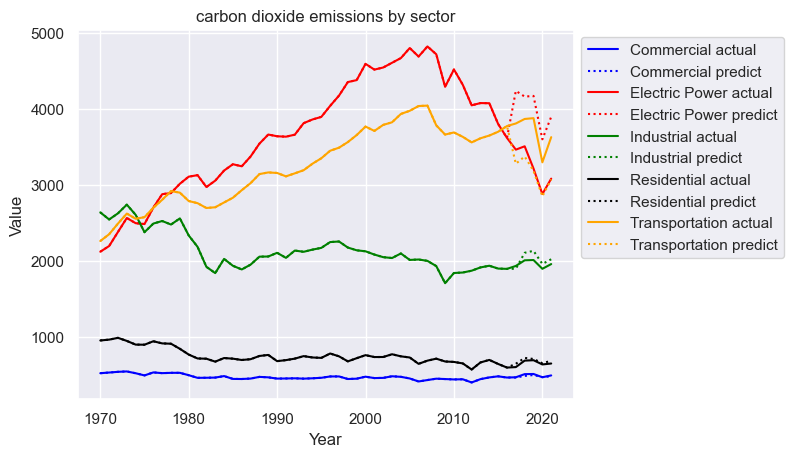

In [34]:
# Plot for sector
import matplotlib.pyplot as plt

sns.set()

# Plot each line separately
plt.plot(processed_df['year'], processed_df['Commercial carbon dioxide emissions Actual'], \
         label='Commercial actual', linestyle='solid', color='blue')
plt.plot(processed_df['year'], processed_df['Commercial carbon dioxide emissions predict'], \
         label='Commercial predict', linestyle='dotted', color='blue')
plt.plot(processed_df['year'], processed_df['Electric Power carbon dioxide emissions Actual'], \
         label='Electric Power actual', linestyle='solid', color='red')
plt.plot(processed_df['year'], processed_df['Electric Power carbon dioxide emissions predict'], \
         label='Electric Power predict', linestyle='dotted', color='red')
plt.plot(processed_df['year'], processed_df['Industrial carbon dioxide emissions Actual'], \
         label='Industrial actual', linestyle='solid', color='green')
plt.plot(processed_df['year'], processed_df['Industrial carbon dioxide emissions predict'], \
         label='Industrial predict', linestyle='dotted', color='green')
plt.plot(processed_df['year'], processed_df['Residential carbon dioxide emissions Actual'], \
         label='Residential actual', linestyle='solid', color='black')
plt.plot(processed_df['year'], processed_df['Residential carbon dioxide emissions predict'], \
         label='Residential predict', linestyle='dotted', color='black')
plt.plot(processed_df['year'], processed_df['Transportation carbon dioxide emissions Actual'], \
         label='Transportation actual', linestyle='solid', color='orange')
plt.plot(processed_df['year'], processed_df['Transportation carbon dioxide emissions predict'], \
         label='Transportation predict', linestyle='dotted', color='orange')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('carbon dioxide emissions by sector')

# Add legend
# Placing legend outside
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

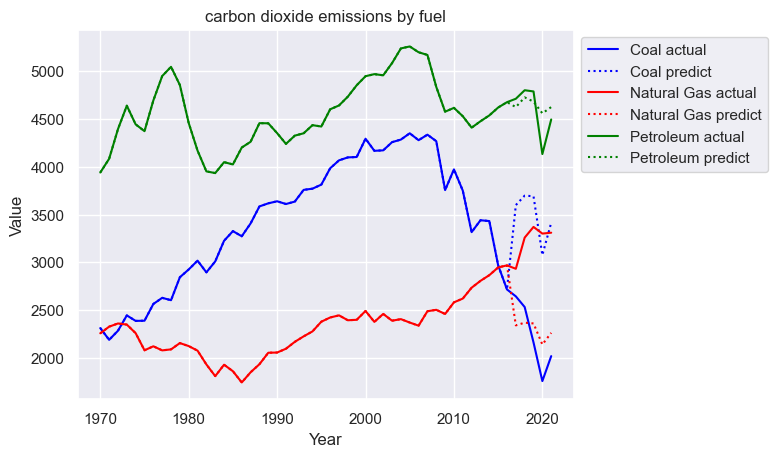

In [35]:
# Plot for fuel
import matplotlib.pyplot as plt

sns.set()

# Plot each line separately
plt.plot(processed_df['year'], processed_df['Coal Actual'], \
         label='Coal actual', linestyle='solid', color='blue')
plt.plot(processed_df['year'], processed_df['Coal predict'], \
         label='Coal predict', linestyle='dotted', color='blue')
plt.plot(processed_df['year'], processed_df['Natural Gas Actual'], \
         label='Natural Gas actual', linestyle='solid', color='red')
plt.plot(processed_df['year'], processed_df['Natural Gas predict'], \
         label='Natural Gas predict', linestyle='dotted', color='red')
plt.plot(processed_df['year'], processed_df['Petroleum Actual'], \
         label='Petroleum actual', linestyle='solid', color='green')
plt.plot(processed_df['year'], processed_df['Petroleum predict'], \
         label='Petroleum predict', linestyle='dotted', color='green')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('carbon dioxide emissions by fuel')

# Add legend
# Placing legend outside
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()
